In [1]:
%load_ext sql

In [2]:
%sql sqlite:///C:/sqlite/chinook2.db

# 1) Introduction

A view is a virtual table containing the result of a saved `SELECT` statement, dynamically created once we query the view. In other words, a view encapsulates queries into a reusable database object to reduce repetitive work and maintain data integrity. Unlike a regular table, **a view doesn’t contain real data**. 

However, like tables, we can query views and join them with other views or tables. Modern database management systems (or DBMSs) allow views to update or insert data into the underlying base table. Since we're using **PostgreSQL** in this lesson, we can create views and update their contents by updating the underlying table.

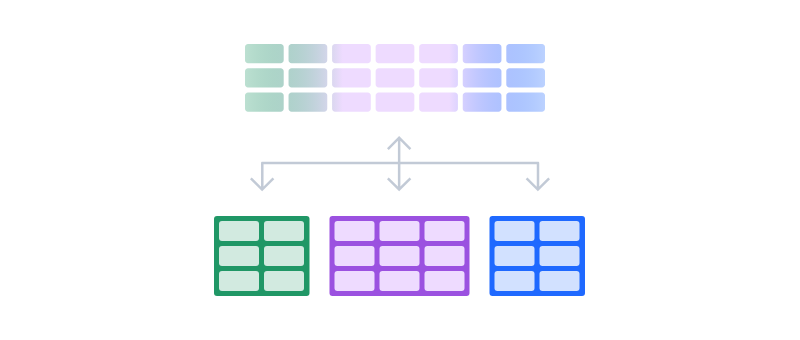

## Why Use Views?

Views are beneficial because they allow us to:

* **Hide Complexities**

One of the main reasons for using views is to simplify complex SQL queries; after the view query is implemented, we can reuse it without knowing the details of the underlying query.

* **Ensure Data Security**

We can make our databases more secure by exposing part of tables instead of complete tables and granting access to particular subsets instead of the entire tables.

* **Represent Data**

Views are a great way to change data format and represent the data differently from their underlying tables.

## What are the differences between CTEs and views?

Previously, we learned about common table expressions (or CTEs) in SQL. Using CTEs and views helps us implement clean and easy-to-follow queries and organize them properly. However, there are some differences between SQL views and CTEs. Here are some of the most significant.

1. A SQL view is a database object whose query is only stored in the database, not the data returned by the query. On the other hand, a CTE is not stored as an object in the database, which means the CTE's query exists in the memory while the query is executing and is discarded when the query execution finishes.

1. Although frequently used queries are ideal candidates for being implemented as views, we use CTEs for occasionally referenced queries.

1. SQL views can be used for data access management too. They restrict users from accessing a particular part of data while they can still use the information they need. CTEs don't provide this capability.

# 2) Creating and Querying Views

Once we know how to write a SQL `SELECT` statement, we know how to create a view, since creating a view is as simple as assigning a name to a `SELECT` statement. When accessed, views automatically return updated results in response to recent updates in the underlying tables.

`CREATE VIEW` defines a new view. We can use the following syntax to create a simple view:

```sql
CREATE VIEW view_name [ ( column_name [, ...] ) ]
AS 
<select-statement>;
```

Let's create our first view, which returns the personal information of our customers but obscures the email addresses of clients to non-authorized users:

```sql
CREATE VIEW customer_email (
       customer_id, first_name, last_name, country, partial_email
  ) AS
SELECT customer_id, first_name,
       last_name, country,
       '****' || SUBSTRING(email, 5) AS email
  FROM customer;
```

We can now query this view as if it were a table:

```sql
SELECT *
  FROM customer_email
 LIMIT 3;
```

You may remember that we signal the end of a `SELECT` statement with `;`. It turns out that CREATE VIEW is also a SQL statement and just like `SELECT`, we can signal its termination with ;.

This allows us to write two consecutive SQL statements, each with a "semi-colon" (`;`) signifying the end of each statement

In [ ]:
%%sql
CREATE VIEW customer_email (
       customer_id, first_name, last_name, country, partial_email
  ) AS
SELECT customer_id, first_name,
       last_name, country,
       '****' || SUBSTRING(email, 5) AS email
  FROM customer;
  
SELECT *
FROM customer_email
LIMIT 3;

 * sqlite:///C:/sqlite/chinook2.db
Done.
Done.


customer_id,first_name,last_name,country,partial_email
1,Luís,Gonçalves,Brazil,****g@embraer.com.br
2,Leonie,Köhler,Germany,****ekohler@surfeu.de
3,François,Tremblay,Canada,****mblay@gmail.com


# 3) Destroying Views

Before we continue learning how to create views, we'll learn how to delete them. We may want to delete a view because it's no longer being used or update an existing view because business needs have changed. You may find as you work through this lesson that you need to modify a view as you test and iterate, but if you try to change the view after it's created, you'll get the following error:

> Error: table view_name already exists

How should we handle this? To redefine a view, we can delete or drop the existing view first. (There are other options to handle this, but they're beyond the scope of this lesson.) We can delete views with the `DROP VIEW` statement like so:

```sql
DROP VIEW view_name;
```

## Instructions

1. Destroy the manager view.

1. Try querying manager.

In [4]:
%%sql
CREATE VIEW manager AS
SELECT employee_id, first_name, last_name, title, email
  FROM employee
 WHERE employee_id IN (SELECT DISTINCT reports_to FROM employee);
 
 DROP VIEW manager;
 
 SELECT *
 FROM manager;

 * sqlite:///C:/sqlite/chinook2.db
Done.
Done.
(sqlite3.OperationalError) no such table: manager
[SQL: SELECT *
 FROM manager;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


# 4) Optional Column Names

You may have noticed that the syntax for the manager view in the previous screen looked a little different. We're not including the new column names!

```sql
CREATE VIEW manager AS
SELECT employee_id, first_name, last_name, title, email
  FROM employee
 WHERE employee_id IN (SELECT DISTINCT reports_to FROM employee);
```

Let's recall the syntax for creating views:

```sql
CREATE VIEW view_name [ ( column_name [, ...] ) ]
AS 
<select-statement>;
```

The square brackets indicate optionality, meaning we don't need to include the column names (unless we want to change them)



## Instructions

Let’s assume we're working as data experts for Chinook, and the company will run a promotion for customers in Germany.

1. Create a view named `german_customers` which returns all the customers in Germany.

    * Do not change the column names

1. Query the view to show the result.

![alt text](chinook_schema.svg)

In [5]:
%%sql
CREATE VIEW german_customers AS
SELECT *
FROM customer
WHERE country = 'Germany';

SELECT *
FROM german_customers

 * sqlite:///C:/sqlite/chinook2.db
Done.
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
36,Hannah,Schneider,None,Tauentzienstraße 8,Berlin,None,Germany,10789,+49 030 26550280,None,hannah.schneider@yahoo.de,5
37,Fynn,Zimmermann,None,Berger Straße 10,Frankfurt,None,Germany,60316,+49 069 40598889,None,fzimmermann@yahoo.de,3
38,Niklas,Schröder,None,Barbarossastraße 19,Berlin,None,Germany,10779,+49 030 2141444,None,nschroder@surfeu.de,3


# 5) Creating Complex Views

SQL views are often more fruitful when they include complex clauses such as `JOIN`, `GROUP BY`, and `HAVING`.

Let's assume the company wants to offer a big discount on Rock albums containing more than fifteen tracks. Our first task is to create a view that returns these albums and their current total price.

```sql
CREATE VIEW rock_albums_with_more_15_songs 
       (genre_name, album_title, album_id,  number_of_tracks, total_amount) AS
SELECT g.name, a.title, a.album_id, COUNT(t.track_id), SUM(t.unit_price)
  FROM album AS a
 INNER JOIN track AS t
    ON a.album_id = t.album_id
 INNER JOIN genre AS g
    ON t.genre_id = g.genre_id
 WHERE g.name='Rock'
 GROUP BY g.name, a.title, a.album_id
HAVING COUNT(t.track_id) > 15
 ORDER BY COUNT(t.track_id) DESC;
```

Following this, we can apply a discount on the total amount of the albums. Let’s assume the crazy discount is **50 percent**. We could get the data as follows:

```sql
SELECT album_title, genre_name, number_of_tracks,
       total_amount*0.5 AS total_amount_after_discount 
  FROM rock_albums_with_more_15_songs;
```

## Instructions

1. Create a view, `genres_most_revenue`, which returns the genres that generated more than **$100** revenue and the revenue amount.

1. Write a `SELECT` statement to see the view's data.

![alt text](chinook_schema.svg)


In [7]:
%%sql
--DROP VIEW genres_most_revenue;

CREATE VIEW genres_most_revenue(genre_name, revenue) AS
SELECT g.name, SUM(i.unit_price * i.quantity) AS revenue
FROM genre g
JOIN track t
  ON g.genre_id = t.genre_id
JOIN invoice_line i
  ON t.track_id = i.track_id
GROUP BY g.name
HAVING ROUND(SUM(i.unit_price * i.quantity),2) > 100
ORDER BY revenue DESC;

SELECT *
FROM genres_most_revenue;

 * sqlite:///C:/sqlite/chinook2.db
Done.
Done.


genre_name,revenue
Rock,2608.65
Metal,612.81
Alternative & Punk,487.08
Latin,165.33
R&B/Soul,157.41
Blues,122.76
Jazz,119.78999999999999
Alternative,115.83


# 6) Creating Views from Views

When we want to implement complex business logics, creating views based on existing views is perfectly acceptable. It's preferable to writing a single view with a complex and challenging definition.

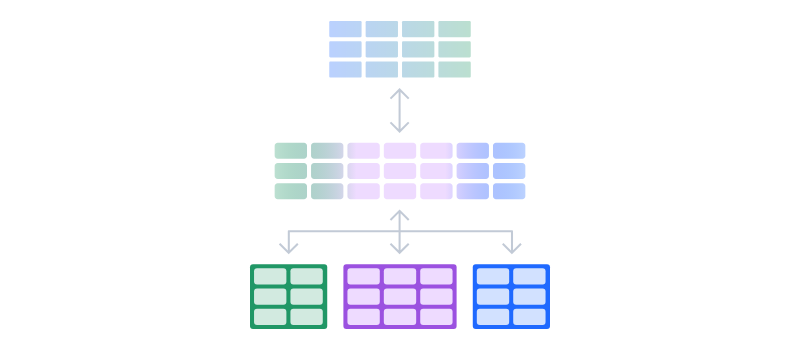


The company would like to suggest songs that last longer than 30 minutes to its customers. To implement the requirement, we can create the following view, which returns all the songs in different genres that last **longer than 30 minutes**.

```sql
CREATE VIEW songs_last_longer_30_min AS
SELECT name, genre_id, track_id,
       ROUND((milliseconds*0.001)/60, 2) AS minutes
  FROM track
 WHERE ROUND((milliseconds*0.001)/60, 2) > 30;
```

The view above returns all the songs in different genres that last longer than 30 minutes.

What if the company wants to suggest, among the previous songs, those in a specific genre? In this case, we can create another view based on the last view, which returns **songs in a particular genre**, e.g., Drama.

In the view definition below, we merged the genre table and the previous view to fetch the drama songs which last longer than 30 minutes.

```sql
CREATE VIEW drama_songs_last_longer_30_min
       (genre_name, song_name, length_in_min)
    AS
SELECT g.name, s.name, s.minutes
  FROM genre AS g
 INNER JOIN songs_last_longer_30_min AS s
    ON g.genre_id = s.genre_id
 WHERE g.genre_id=21;
```

Finally

```sql
SELECT *
  FROM drama_songs_last_longer_30_min LIMIT 5;
```

# Instructions

The company is interested in knowing each genre's total sales and number of customers. Our task is to implement the solution.

1. Create a view, `customer_purchase`, that returns the `genre_name`, `unit_price`, `quantity`, and `customer_id` columns by joining the `genre`, `track`, `invoice`, and `invoice_line` tables.

1. Create another view, `total_sales_customers`, based on the first view, which calculates the **total amount in sales** and **number of customers** for each **genre**.

1. Query the second view, and sort the result based on the number of customers in **descending order** to reveal which genre sold the most.

![alt text](chinook_schema.svg)

In [ ]:
%%sql

CREATE VIEW customer_purchase(genre_name,customer_id, unit_price, quantity) AS
SELECT g.name,
       i.customer_id,
       il.unit_price,
       il.quantity  
  FROM invoice i
  JOIN invoice_line il
    ON i.invoice_id = il.invoice_id
  JOIN track t
    ON il.track_id = t.track_id
  JOIN genre g
    ON t.genre_id = g.genre_id;
 
CREATE VIEW total_sales_customers(genre_name, total_amount, customer_count) AS
SELECT genre_name,
       SUM(unit_price*quantity) as total_amount,
       COUNT(customer_id) AS customer_count
  FROM customer_purchase
 GROUP BY genre_name;
  
  
SELECT *
FROM total_sales_customers
ORDER BY total_amount DESC;

 * sqlite:///C:/sqlite/chinook2.db
Done.
Done.
Done.


genre_name,total_amount,customer_count
Rock,2608.65,2635
Metal,612.81,619
Alternative & Punk,487.08,492
Latin,165.33,167
R&B/Soul,157.41,159
Blues,122.76,124
Jazz,119.78999999999999,121
Alternative,115.83,117
Easy Listening,73.26,74
Pop,62.37,63


# 7) Dropping Views with Dependencies

Let's recall part of the code from the previous screen's Learn section

```sql
CREATE VIEW songs_last_longer_30_min AS
SELECT name, genre_id, track_id, ROUND((milliseconds*0.001)/60, 2) AS minutes
  FROM track
 WHERE ROUND((milliseconds*0.001)/60, 2) > 30;

CREATE VIEW drama_songs_last_longer_30_min
       (genre_name, song_name, length_in_min)
    AS
SELECT g.name, s.name, s.minutes
  FROM genre AS g
 INNER JOIN songs_last_longer_30_min AS s
    ON g.genre_id = s.genre_id
 WHERE g.genre_id=21;
 ```

If we try to delete `songs_last_longer_30_min` with `DROP VIEW songs_last_longer_30_min`, we get an error.

This is because the `drama_songs_last_longer_30_min` view depends on `songs_last_longer_30_min`, so the database prevents us from deleting it.

To force the destruction of `songs_last_longer_30_min` and its dependents, we can append the `CASCADE` option to the end of the statement like this:

```sql
DROP VIEW songs_last_longer_30_min CASCADE;
```

The `CASCADE` option is not available in **SQLite**. In this lesson, we're using a different database named PostgreSQL. While CASCADE is not available in SQLite, it is an option in most databases.